# 주택가격 회귀 분석

## 데이터 불러오기 

In [89]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [128]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

#사이킷 런에서 제공하는 데이터 불러오기
boston = load_boston()


In [129]:
#print(type(boston)) #class 'sklearn.utils.Bunch'>
print(boston.DESCR) #데이터 정보 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [130]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [131]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 분석 모델 구축

In [132]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [133]:
y =boston_df['PRICE'] # 레이블(예측해야하는 값, 종속변수)
x =boston_df.drop(['PRICE'], axis =1, inplace = False) #피처 (에측에 도움이 된느 값들. 독립변수)

In [134]:
#훈련용 데이터랑 평가용 데이터 분할 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=156)

In [97]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [98]:
#선형 최귀분석을 통해서 - 예측값을 구할 수 있다 
y_predict = lr.predict(x_test)

## 결과 분석 및 시각화  

In [99]:
mse = mean_squared_error(y_test, y_predict, squared=True) # MSE

rmse = np.sqrt(mse)
rmse2 = mean_squared_error(y_test, y_predict, squared=False) #RMSE의 수치가 낮을 수록 성능이 좋음

In [100]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse2))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_test, y_predict))) # 1에 가까워야 성능이 좋은거 

MSE : 17.297, RMSE : 4.159
MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


In [101]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  40.9955951721646
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [141]:
print("훈련 세트 점수", lr.score(x_train, y_train))
print("테스트 세트 점수", lr.score(x_test, y_test))

훈련 세트 점수 0.7273505005599823
테스트 세트 점수 0.7572263323138935


In [102]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=x.columns)
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

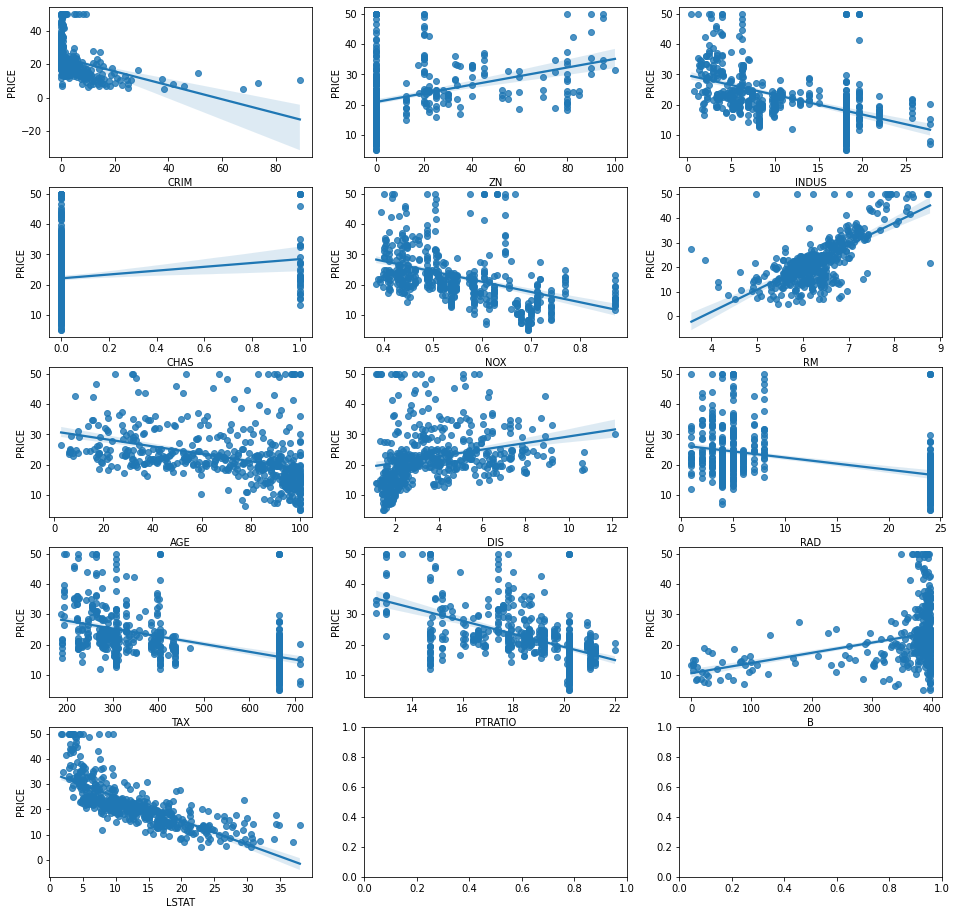

In [104]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_valid)
# y데이터 타입이 float으로 되어 있는데 이진분류를 위한 0과 1의 값은 int로 되어 있어야 하기때문에 생기는 오류 
#y데이터 타입을 int로 바꾸줘야 

ValueError: Unknown label type: 'continuous'

In [110]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
49,0.21977,0.0,6.91,0.0,0.448,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
261,0.53412,20.0,3.97,0.0,0.647,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52


In [112]:
y_train

49     19.4
19     18.2
261    43.1
503    23.9
72     22.8
       ... 
63     25.0
485    21.2
418     8.8
204    50.0
44     21.2
Name: PRICE, Length: 354, dtype: float64

In [121]:
y_train_int = y_train.astype('int')
y_train_int
y_test_int = y_test.astype('int')

In [123]:
x_train_int = x_train.astype('int')
x_test_int = x_test.astype('int')

In [119]:
knn.fit(x_train_int, y_train_int)
prediction = knn.predict(x_test_int)
print(prediction)

[19 18 31 11 24 16 19 23 11 13 11 29 17 24 17 18  5 13 18 17 14 13 21 11
 19  5  8 21 17 13 22  9 18 15 14 10 11  7 17 22 19  7 10 14 17 20 24 21
 50 22 27 22 50 12 19 22 15 31 21 13 21 19 21 13 20 22 29 23  8 17 17 24
 19 17 13 19 16 23 23 13 19 16 17 20 20 19 29 29 18 21 20 14 19 19 21 23
 11 18 21 21 21 23 13 19 19 19 15 29 18 19 23 25 19 22 11 20 19 14 19 20
 26 17 22 29 18 23  5  8 21 27 17 23 29 18 20 19 21 13 18 15 22 19 16 17
 21 15 21 12 22 25 10 20]


In [124]:
#세트 정확도 
print(knn.score(x_test, y_test))

0.125


## 릿지

In [137]:
from sklearn.linear_model import Ridge

In [138]:
ridge = Ridge().fit(x_train, y_train)

In [139]:
print("테스트 데이터 점수", ridge.score(x_train, y_train))
print("테스트 데이터 점수", ridge.score(x_test, y_test))

테스트 데이터 점수 0.7242456703113703
테스트 데이터 점수 0.7584907011357215


In [142]:
ridge = Ridge(alpha=0.1).fit(x_train, y_train)
print("테스트 데이터 점수", ridge.score(x_train, y_train))
print("테스트 데이터 점수", ridge.score(x_test, y_test))

테스트 데이터 점수 0.7272569626530365
테스트 데이터 점수 0.7579649342693631


# 자동차 연비 예측 분석 

In [45]:
import numpy as np
import pandas as pd

data_df = pd.read_csv('./10장_data/auto-mpg.csv', header=0, engine='python')
data_df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [46]:
data_df = data_df.drop(['car_name', 'origin','horsepower'], axis = 1, inplace = False)
data_df

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82
394,44.0,4,97.0,2130,24.6,82
395,32.0,4,135.0,2295,11.6,82
396,28.0,4,120.0,2625,18.6,82


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
y = data_df['mpg']
x = data_df.drop(['mpg'], axis=1, inplace=False)

In [28]:
#train, test 데이터 나누기 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)


In [29]:
#모델 생성
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [30]:
y_predict = lr.predict(x_test) # x 테스트를 가지고서 예측하는거! 

In [32]:
#성능 지수 추출해보기 
mse = mean_squared_error(y_test,y_predict) #테스트랑 예측한거랑 해서 평균제곱오차. 손실함수 
rmse = mean_squared_error(y_test, y_predict, squared=False)

print('MSE : {0:3f}, RMSE : {1:3f}'.format(mse, rmse))
print('R^2(결정계수 Variance score): {0: 3f}'.format(r2_score(y_test, y_predict)))

MSE : 12.278239, RMSE : 3.504032
R^2(결정계수 Variance score):  0.807858


In [34]:
print("y 절편, 편향 :", np.round(lr.intercept_, 2))
print("가중치, 회귀계수 : ", np.round(lr.coef_, 2))

y 절편, 편향 : -17.55
가중치, 회귀계수 :  [-0.14  0.01 -0.01  0.2   0.76]


In [37]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=x.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

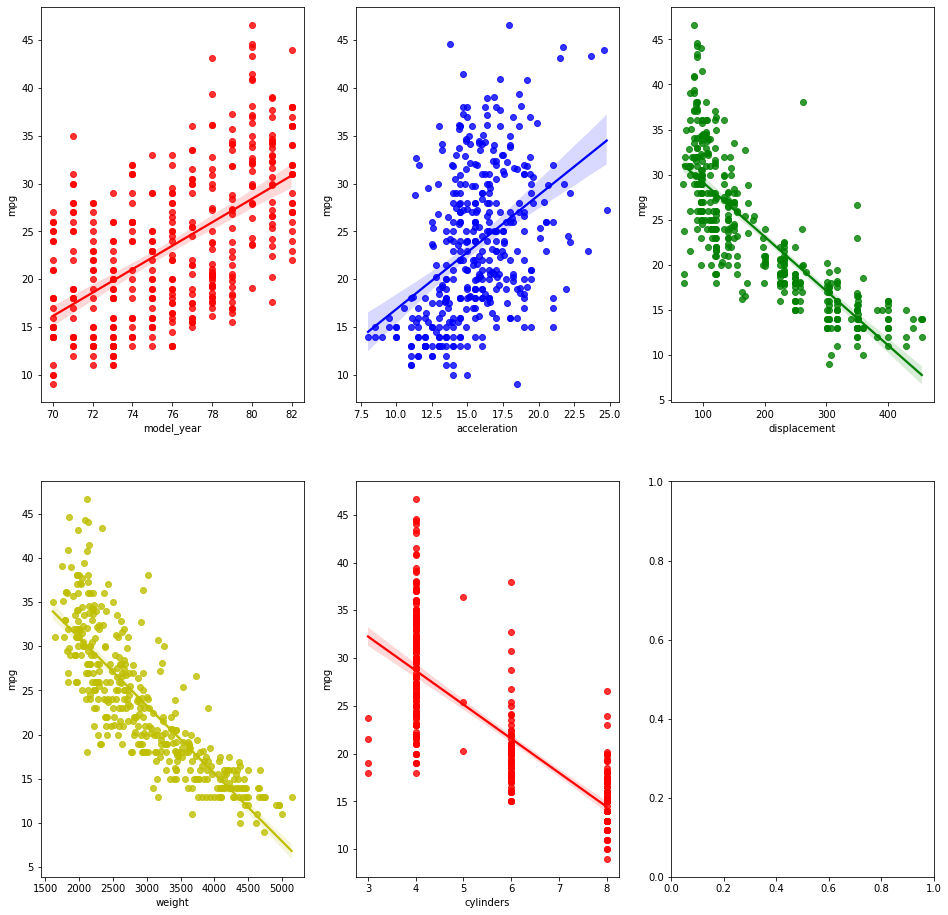

In [48]:
#결과값을 시각화 하는게 아니지 않아? 
#예측 전의 데이터를 시각화 하는게 맞는거지 
fig, axs = plt.subplots(figsize = (16,16), ncols =3, nrows =2)
x_features = ['model_year','acceleration','displacement','weight','cylinders']
plot_color = ['r', 'b', 'g', 'y','r']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y ='mpg', data = data_df, ax=axs[row][col], color=plot_color[i])

In [50]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

#앞에서 lr에 fit을 했으니까 예측을 할 수 있음 
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])
print('%.2f' % mpg_predict)

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model_year : 99
41.32


# 이미지 

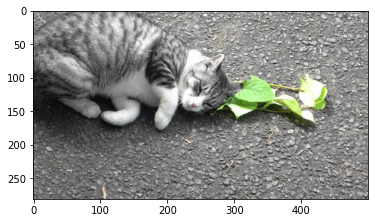

In [75]:
#TypeError: Image data of dtype <U10 cannot be converted to float
import matplotlib.image as img
image = img.imread('./geda.jpg')
plt.imshow(image)
plt.show()


In [76]:
print(image.shape)
#batchsize, height, width, channel
#Convolution - 특징, 패턴을 뽑아가는 과정

(281, 500, 3)


In [77]:
import tensorflow as tf
#차원 추가 
image = image[tf.newaxis, ...]
print(image.shape)

(1, 281, 500, 3)


In [78]:
#keras를 이용해서 convolution 할 수 있음
tf.keras.layers.Conv2D(filters = 3, kernel_size =(3,3), strides = (1,1), padding='SAME', activation='relu')

In [79]:
image.dtype

dtype('uint8')

In [81]:
image = tf.cast(image, dtype=tf.float32) #데이터 타입 변환
image.dtype

tf.float32

In [82]:
layer = tf.keras.layers.Conv2D( 3, 3, 1, 'SAME')
layer

In [83]:
output = layer(image)
output

<tf.Tensor: shape=(1, 281, 500, 3), dtype=float32, numpy=
array([[[[  35.333584 ,  -11.786817 ,  -71.542816 ],
         [ 105.61002  , -113.73794  ,  -17.709589 ],
         [  95.522385 , -127.11922  ,   20.922548 ],
         ...,
         [ 122.51214  , -120.46631  ,   19.843948 ],
         [ 120.52462  , -121.25762  ,    6.429355 ],
         [  31.239126 , -158.77657  ,   51.27025  ]],

        [[  67.629234 ,  -22.599337 ,  -68.952225 ],
         [  45.928936 ,  -27.023628 , -103.85375  ],
         [  65.76491  ,  -54.267426 ,  -88.476265 ],
         ...,
         [ 105.37036  , -102.1718   ,  -53.022472 ],
         [  83.684105 ,  -57.573334 , -109.09292  ],
         [ -22.055832 ,  -68.67479  ,    3.5545597]],

        [[  52.35926  ,  -34.149326 ,  -86.726326 ],
         [  85.709526 ,  -97.24877  ,  -78.5195   ],
         [  83.72759  ,  -80.88236  ,  -73.5179   ],
         ...,
         [  50.462315 ,  -83.604706 , -130.42656  ],
         [  62.707302 ,  -73.72233  , -111.88735

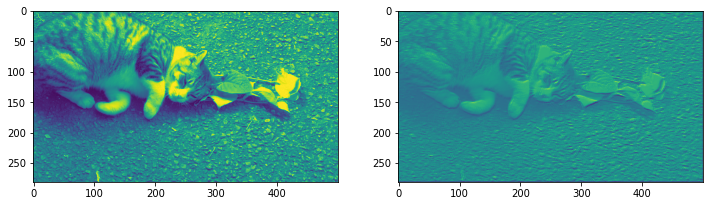

In [85]:
plt.figure(figsize =(12,12))
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0])
plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0])
plt.show()

# 의사결정트리 

In [1]:
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

In [2]:
#사용자 움직임 분류... 

feature_name_df= pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/features.txt', sep='\s+', header = None, names=['index','feature_name'], engine = 'python')
feature_name_df

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [3]:
# index 제거하고, feature_name만 리스트로 저장
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [4]:
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [5]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('feature_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['feature_name'] = new_feature_name_df[['feature_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [6]:

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
#     feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
#                         header=None,names=['column_index','column_name'])
    feature_name_df= pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/features.txt', sep='\s+', 
                                 header = None, names=['index','feature_name'], engine = 'python')

    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
#     # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
#     X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
#     X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
#     # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
#     y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
#     y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])


    x_train = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/train/X_train.txt', sep='\s+', names=feature_name, engine='python')
    x_test = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/test/X_test.txt', sep='\s+', names=feature_name, engine='python')

    y_train = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'], engine='python')
    y_test = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'], engine='python')

    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return x_train, x_test, y_train, y_test








In [7]:
x_train, x_test, y_train, y_test = get_human_dataset()

In [8]:
x_train.isnull().sum()

tBodyAcc-mean()-X                          0
tBodyAcc-mean()-Y                          0
tBodyAcc-mean()-Z                          0
tBodyAcc-std()-X                           0
tBodyAcc-std()-Y                           0
                                        ... 
angle(tBodyGyroJerkMean,gravityMean)       0
angle(X,gravityMean)                       0
angle(Y,gravityMean)                       0
angle(Z,gravityMean)                       0
NaN                                     7352
Length: 562, dtype: int64

In [9]:
#결측 데이터 없애기 
x_train = x_train.dropna(axis =1)

In [10]:
x_test = x_test.dropna(axis =1)

## 모델 구축- 결정트리모델 

In [11]:
# 결정 트리 분류 분석 : 1) 모델 생성
# 결정 트리 분류 분석 : 2) 모델 훈련
dt_model = DecisionTreeClassifier(random_state = 156)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=156)

In [12]:
# 결정 트리 분류 분석 : 3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
y_predict = dt_model.predict(x_test)

## 결과 분석(정확도 확인) 

In [13]:
print('훈련 세트 정확도 점수:', dt_model.score(x_train, y_train))
print('테스트 세트 정확도 점수:', dt_model.score(x_test, y_test))

훈련 세트 정확도 점수: 1.0
테스트 세트 정확도 점수: 0.8547675602307431


In [14]:
from sklearn.metrics import accuracy_score

#결정트리 정확도 
accuracy = accuracy_score(y_test, y_predict)
print("결정 트리 정확도: {0:.4f}".format(accuracy))

결정 트리 정확도: 0.8548


### 성능 개선을 위한 파라미터 찾기 1

In [15]:
print('결정 트리의 현재 하이퍼 파라미터', dt_model.get_params()) #현재 트리의 파라미터 

결정 트리의 현재 하이퍼 파라미터 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
#최적의 뎁스? 이런 뎁스를 가진 파라미터를 찾고 싶은건가!>>>???? 
params = {
    'max_depth' : [ 6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_model, param_grid = params, scoring = 'accuracy', cv=5, return_train_score=True)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [18]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.364051,0.017258,0.006201,3.999950e-04,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,...,0.850791,0.028313,5,0.963272,0.939126,0.945937,0.931826,0.944237,0.944879,0.010424
1,1.714879,0.033729,0.005997,9.781556e-06,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,...,0.851069,0.027719,3,0.985887,0.985377,0.984529,0.977559,0.980109,0.982692,0.003281
2,2.022902,0.061876,0.006202,4.006625e-04,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,...,0.851209,0.037707,2,0.992348,0.995919,0.994560,0.992690,0.991499,0.993403,0.001607
3,2.254309,0.113420,0.006002,6.143617e-07,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,...,0.844135,0.035598,7,0.995579,0.998640,0.997790,0.997790,0.996260,0.997212,0.001121
4,2.524723,0.201528,0.006002,5.560829e-07,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,...,0.851344,0.038140,1,0.998980,1.000000,0.999830,0.999660,0.999830,0.999660,0.000357
5,2.552572,0.232120,0.006402,4.900377e-04,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,...,0.850800,0.035718,4,0.999830,1.000000,1.000000,1.000000,1.000000,0.999966,0.000068
6,2.566836,0.234609,0.006003,3.108598e-06,24,{'max_depth': 24},0.796057,0.818491,0.856463,0.877551,...,0.849440,0.037597,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [19]:
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850791,0.944879
1,8,0.851069,0.982692
2,10,0.851209,0.993403
3,12,0.844135,0.997212
4,16,0.851344,0.999660
5,20,0.850800,0.999966
6,24,0.849440,1.000000


In [20]:
print('최고 평균 정확도 : {0:.4f}, 최적 하이퍼 파라미터 :{1}'.format(grid_cv.best_score_ , grid_cv.best_params_))

최고 평균 정확도 : 0.8513, 최적 하이퍼 파라미터 :{'max_depth': 16}


#### GridSearch 활용 예제 (돌리지마)
이해가 안되서 좀더 예제 보기로

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#GridSearch가 찾을 parameter를 정의
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}
#적용할 estimator (모델)를 정의
estimator = RandomForestRegressor()

In [25]:
#평가지표인 cross validation을 지정해 주어야하는데, int값으로 넘겨줄 수 도 있고, 내가 정의한 Fold를 넘겨줄 수 도 있습니다.
from sklearn.model_selection import KFold

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [26]:
#돌리지마
#GridSearch를 실행해 주면 됩니다. n_jobs=-1로 지정해주면 모든 코어를 다 사용하기때문에 컴퓨터는 뜨거워지겠지만, 
#속도는 많이 빨라집니다. verbose로 log 출력의 level을 조정 (숫자가 클 수록 많은 log 출력) 해 줄 수 있습니다.
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


KeyboardInterrupt: 

In [21]:
#Best Parameter의 결과값 확인
grid_search.best_params_

NameError: name 'grid_search' is not defined

### 성능 개선을 위한 파라미터 찾기 2

In [22]:
params = {
    'max_depth' : [ 8, 16, 20 ],
    'min_samples_split' : [ 8, 16, 24 ]
}

grid_cv = GridSearchCV(dt_model,param_grid = params, scoring = 'accuracy', cv = 5, return_train_score=True )
grid_cv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [23]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [24]:
#파라미터 결과값 df로 만들기 
cv_result = pd.DataFrame(grid_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.740498,0.039370,0.006202,0.000400,8,8,"{'max_depth': 8, 'min_samples_split': 8}",0.804215,0.828688,0.862585,...,0.852023,0.031575,2,0.984867,0.984356,0.983169,0.976369,0.978579,0.981468,0.003380
1,1.736412,0.050393,0.006201,0.000400,8,16,"{'max_depth': 8, 'min_samples_split': 16}",0.806254,0.830048,0.860544,...,0.854879,0.033764,1,0.982996,0.981806,0.981809,0.974498,0.978069,0.979836,0.003142
2,1.721797,0.030276,0.006000,0.000001,8,24,"{'max_depth': 8, 'min_samples_split': 24}",0.806934,0.830048,0.857143,...,0.851342,0.029739,3,0.978575,0.981806,0.981469,0.972118,0.977219,0.978237,0.003515
3,2.550811,0.185078,0.006201,0.000400,16,8,"{'max_depth': 16, 'min_samples_split': 8}",0.791298,0.807614,0.856463,...,0.844136,0.038071,9,0.995409,0.995409,0.993540,0.994900,0.993030,0.994457,0.000989
4,2.531676,0.177000,0.006602,0.000490,16,16,"{'max_depth': 16, 'min_samples_split': 16}",0.800816,0.815092,0.858503,...,0.847127,0.033379,7,0.993028,0.990308,0.990479,0.990479,0.988099,0.990479,0.001562
5,2.557647,0.189685,0.006398,0.000486,16,24,"{'max_depth': 16, 'min_samples_split': 24}",0.805574,0.820530,0.854422,...,0.849439,0.032045,4,0.987077,0.989968,0.987929,0.982659,0.986229,0.986772,0.002402
6,2.582593,0.250170,0.006200,0.000401,20,8,"{'max_depth': 20, 'min_samples_split': 8}",0.801496,0.807614,0.856463,...,0.846040,0.035227,8,0.995409,0.995409,0.993540,0.994900,0.993200,0.994491,0.000941
7,2.574636,0.239784,0.005902,0.000199,20,16,"{'max_depth': 20, 'min_samples_split': 16}",0.798097,0.815092,0.858503,...,0.848624,0.036559,6,0.992858,0.990308,0.990479,0.990479,0.988269,0.990479,0.001454
8,2.596384,0.218774,0.006401,0.000490,20,24,"{'max_depth': 20, 'min_samples_split': 24}",0.804895,0.820530,0.854422,...,0.849167,0.032067,5,0.986907,0.989968,0.987929,0.982659,0.986399,0.986772,0.002393


In [25]:
cv_result[['param_max_depth','param_min_samples_split', 'mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,8,0.852023,0.981468
1,8,16,0.854879,0.979836
2,8,24,0.851342,0.978237
3,16,8,0.844136,0.994457
4,16,16,0.847127,0.990479
5,16,24,0.849439,0.986772
6,20,8,0.846040,0.994491
7,20,16,0.848624,0.990479
8,20,24,0.849167,0.986772


In [26]:
print('최고 평균 정확도 : {0:.4f}, 최적 하이퍼 파라미터 :{1}'.format(grid_cv.best_score_ , grid_cv.best_params_))

최고 평균 정확도 : 0.8549, 최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_split': 16}


In [27]:
best_dt_har = grid_cv.best_estimator_ #최고 점수를 낸 파라미터를 가진 모형
best_Y_predict = best_dt_har.predict(x_test)
best_accuracy = accuracy_score(y_test, best_Y_predict)
print('best 결정 크리 예측 정확도: {0:.4f}'.format(best_accuracy))

best 결정 크리 예측 정확도: 0.8717


In [28]:
#중요 피처 확인하기 
import seaborn as sns
import matplotlib.pyplot as plt

#최고 점수를 낸 파라미터 중에서 가장 중요한 것들?? 
feature_importance_values =best_dt_har.feature_importances_

feature_importance_values


array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

In [29]:
print(type(feature_importance_values))

<class 'numpy.ndarray'>


In [30]:
feature_importance_values_s = pd.Series(feature_importance_values, index=x_train.columns)
feature_importance_values_s

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.001752
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001291
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000989
angle(Y,gravityMean)                    0.139001
angle(Z,gravityMean)                    0.002987
Length: 561, dtype: float64

In [31]:
#10개 추리기 
feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10]

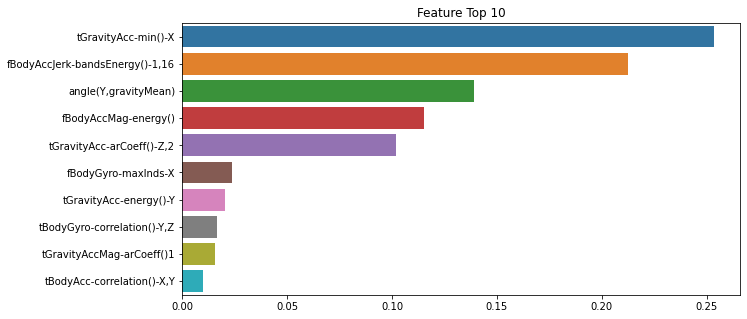

In [32]:
plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x=feature_top10, y=feature_top10.index)
plt.show()

In [33]:
import graphviz

In [34]:
label_name_df = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/activity_labels.txt', sep='\s+',  header=None, names=['index', 'label'], engine='python')
# index 제거하고, feature_name만 리스트로 저장
label_name = label_name_df.iloc[:, 1].values.tolist()

label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [35]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성. 
export_graphviz(best_dt_har, out_file="tree.dot", class_names=label_name , feature_names = feature_name, impurity=True, filled=True)

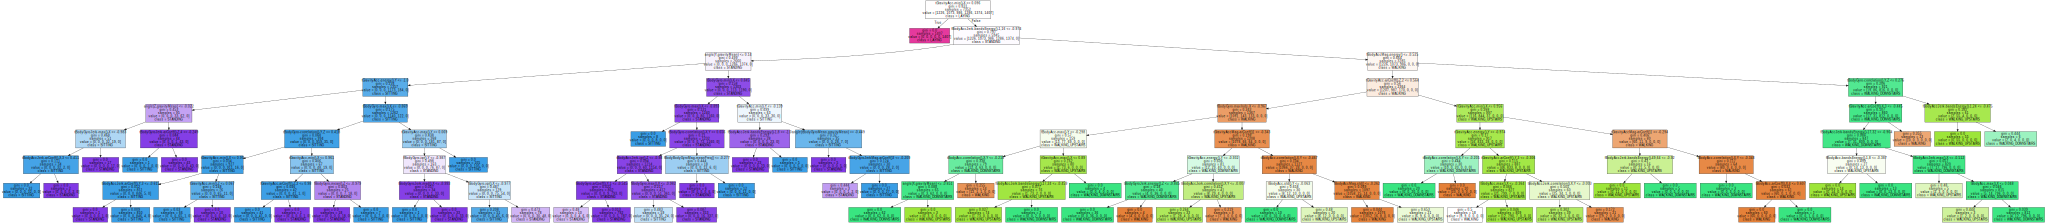

In [36]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)